In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
cancer_rates = pd.read_csv("Cancer Rates.csv")
cancer_rates_by_race = pd.read_csv("Cancer Rates Race.csv")
funding_data = pd.read_csv("Funding Data.csv")

for idx, row in cancer_rates.iterrows():
    # drop rows with unreliable data
    if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
        cancer_rates = cancer_rates.drop(idx)

# convert Mortality-Incidence Age-Adjusted Rate Ratio column to floats
cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"] = cancer_rates["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
cancer_rates["Year"] = cancer_rates["Year"].astype('int')

In [3]:
mel = cancer_rates[cancer_rates["Leading Cancer Sites"] == "Melanoma of the Skin"]
mel[mel["Year"] == 2002]

,Leading Cancer Sites,Year,State,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
10142,Melanoma of the Skin,2002,Alabama,0.203,2.738,13.486
10143,Melanoma of the Skin,2002,Arizona,0.154,3.055,19.789
10144,Melanoma of the Skin,2002,Arkansas,0.198,2.140,10.810
10145,Melanoma of the Skin,2002,California,0.131,2.478,18.861
10146,Melanoma of the Skin,2002,Colorado,0.127,2.716,21.456
10147,Melanoma of the Skin,2002,Connecticut,0.118,2.475,20.897
10148,Melanoma of the Skin,2002,Delaware,0.179,2.882,16.110
10149,Melanoma of the Skin,2002,Florida,0.143,2.771,19.376
10150,Melanoma of the Skin,2002,Georgia,0.130,2.571,19.765
10151,Melanoma of the Skin,2002,Hawaii,0.096,1.672,17.340


In [4]:
totalratesbyrace = cancer_rates_by_race[5114:]
cancerratesbyrace = cancer_rates_by_race[:5040]
totalratesbyrace

,Leading Cancer Sites,Year,Region,Race,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
5114,Midwest,American Indian or Alaska Native,33,NaN,NaN,NaN,NaN
5115,Midwest,Asian or Pacific Islander,103,NaN,NaN,NaN,NaN
5116,Midwest,Black or African American,959,NaN,NaN,NaN,NaN
5117,Midwest,White,8389,NaN,NaN,NaN,NaN
5118,Midwest,Other Races and Unknown combined,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6453,West,American Indian or Alaska Native,28,NaN,NaN,NaN,NaN
6454,West,Asian or Pacific Islander,184,NaN,NaN,NaN,NaN
6455,West,Black or African American,121,NaN,NaN,NaN,NaN
6456,West,White,3128,NaN,NaN,NaN,NaN


In [5]:
leading_cancer_sites = []
for idx, row in cancer_rates.iterrows():
    if row["Leading Cancer Sites"] not in leading_cancer_sites:
        leading_cancer_sites.append(row["Leading Cancer Sites"])

years = []
for idx, row in cancer_rates.iterrows():
    if row["Year"] not in years:
        years.append(row["Year"])
        
races = ["White", "Black or African American", "Asian or Pacific Islander", "American Indian or Alaska Native"]

regions = list(set(list(cancerratesbyrace["Region"])))

states = list(set(list(cancer_rates["State"])))

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [7]:
def incbyrace(race, year):
    racedict = {}
    year = str(year)
    raceyear = cancerratesbyrace[cancerratesbyrace["Year"] == year]
    racecancer = raceyear[raceyear["Race"] == race]
    for cancer in leading_cancer_sites:
        racedict[cancer] = 0
        for i in range(len(racecancer)):
            if racecancer.iloc[i]["Leading Cancer Sites"] == cancer:
                racedict[cancer] += racecancer.iloc[i]["Incidence Age-Adjusted Rate (per 100,000)"]
    return racedict

def mortbyrace(race, year):
    racedict = {}
    year = str(year)
    raceyear = cancerratesbyrace[cancerratesbyrace["Year"] == year]
    racecancer = raceyear[raceyear["Race"] == race]
    for cancer in leading_cancer_sites:
        racedict[cancer] = 0
        for i in range(len(racecancer)):
            if racecancer.iloc[i]["Leading Cancer Sites"] == cancer:
                racedict[cancer] += racecancer.iloc[i]["Mortality Age-Adjusted Rate (per 100,000)"]
    return racedict    

In [8]:
mortdict = {}
incdict = {}
for race in races:
    mortdict[race] = mortbyrace(race, "2016")
    incdict[race] = incbyrace(race, "2016")

In [9]:
mortdf = pd.DataFrame(mortdict)
incdf = pd.DataFrame(incdict)

In [10]:
newincdf = pd.DataFrame()
highincdf = pd.DataFrame()
newmortdf = pd.DataFrame()
highmortdf = pd.DataFrame()
for cancer in leading_cancer_sites:
    if cancer in ["Prostate","Colon and Rectum", "Breast", "Lung and Bronchus"]:
        highincdf[cancer] = incdf.loc[cancer]
        highmortdf[cancer] = mortdf.loc[cancer]
    else:
        newincdf[cancer] = incdf.loc[cancer]
        newmortdf[cancer] = mortdf.loc[cancer]
newincdf = newincdf.T
highincdf = highincdf.T
newmortdf = newmortdf.T
highmortdf = highmortdf.T

In [11]:
def cancerdf(cancer):
    cancerdf = pd.DataFrame()
    cancerdf["Incidence"] = incdf.loc[cancer]
    cancerdf["Mortality"] = mortdf.loc[cancer]
    cancerdf = cancerdf.T
    return cancerdf

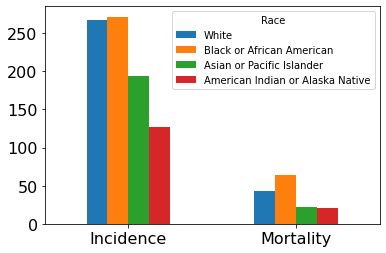

In [12]:
breastdf = cancerdf("Breast")
breastdf[races].plot(kind="bar")
plt.xticks(size=16, rotation=0)
plt.yticks(size=16)
plt.legend(title="Race")

In [13]:
mortdict2005 = {}
incdict2005 = {}
for race in races:
    mortdict2005[race] = mortbyrace(race, "2005")
    incdict2005[race] = incbyrace(race, "2005")
mortdf2005 = pd.DataFrame(mortdict2005)
incdf2005 = pd.DataFrame(incdict2005)

In [14]:
lungdf2005 = pd.DataFrame()
lungdf2005["Incidence"] = incdf2005.loc[cancer]
lungdf2005["Mortality"] = mortdf2005.loc[cancer]
lungdf2005 = lungdf2005.T

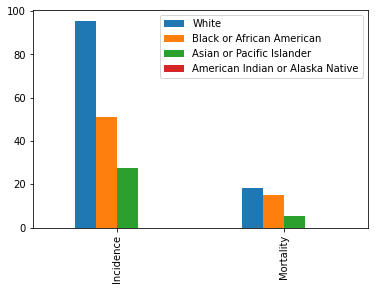

In [15]:
#2005
lungdf = cancerdf("Lung and Bronchus")
lungdf2005[races].plot(kind="bar")
plt.legend(loc="upper right")
#https://www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/resource-library/lung-cancer-fact-sheet
#accounts for 25% of all cancer deaths in a year
#peaked in 2005, has decrease since

In [16]:
mortdict2016 = {}
incdict2016 = {}
for race in races:
    mortdict2016[race] = mortbyrace(race, "2016")
    incdict2016[race] = incbyrace(race, "2016")
mortdf2016 = pd.DataFrame(mortdict2016)
incdf2016 = pd.DataFrame(incdict2016)

In [17]:
lungdf2016 = pd.DataFrame()
lungdf2016["Incidence"] = incdf2016.loc[cancer]
lungdf2016["Mortality"] = mortdf2016.loc[cancer]
lungdf2016 = lungdf2016.T

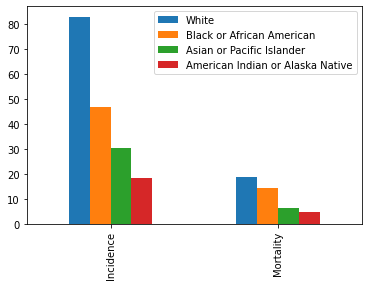

In [18]:
lungdf2016[races].plot(kind="bar")

In [19]:
mortdict1999 = {}
incdict1999 = {}
for race in races:
    mortdict1999[race] = mortbyrace(race, "1999")
    incdict1999[race] = incbyrace(race, "1999")
mortdf1999 = pd.DataFrame(mortdict1999)
incdf1999 = pd.DataFrame(incdict1999)

In [20]:
lungdf1999 = pd.DataFrame()
lungdf1999["Incidence"] = incdf1999.loc[cancer]
lungdf1999["Mortality"] = mortdf1999.loc[cancer]
lungdf1999 = lungdf1999.T

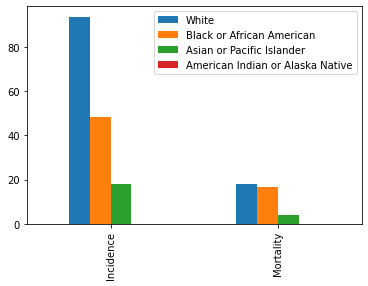

In [21]:
lungdf1999[races].plot(kind="bar")

In [22]:
mortdict2010 = {}
incdict2010 = {}
for race in races:
    mortdict2010[race] = mortbyrace(race, "2010")
    incdict2010[race] = incbyrace(race, "2010")
mortdf2010 = pd.DataFrame(mortdict2010)
incdf2010 = pd.DataFrame(incdict2010)

In [23]:
lungdf2010 = pd.DataFrame()
lungdf2010["Incidence"] = incdf2010.loc[cancer]
lungdf2010["Mortality"] = mortdf2010.loc[cancer]
lungdf2010 = lungdf2010.T

In [24]:
mortdict2007 = {}
incdict2007 = {}
for race in races:
    mortdict2007[race] = mortbyrace(race, "2007")
    incdict2007[race] = incbyrace(race, "2007")
mortdf2007 = pd.DataFrame(mortdict2007)
incdf2007 = pd.DataFrame(incdict2007)

In [25]:
lungdf2007 = pd.DataFrame()
lungdf2007["Incidence"] = incdf2007.loc[cancer]
lungdf2007["Mortality"] = mortdf2007.loc[cancer]
lungdf2007 = lungdf2007.T

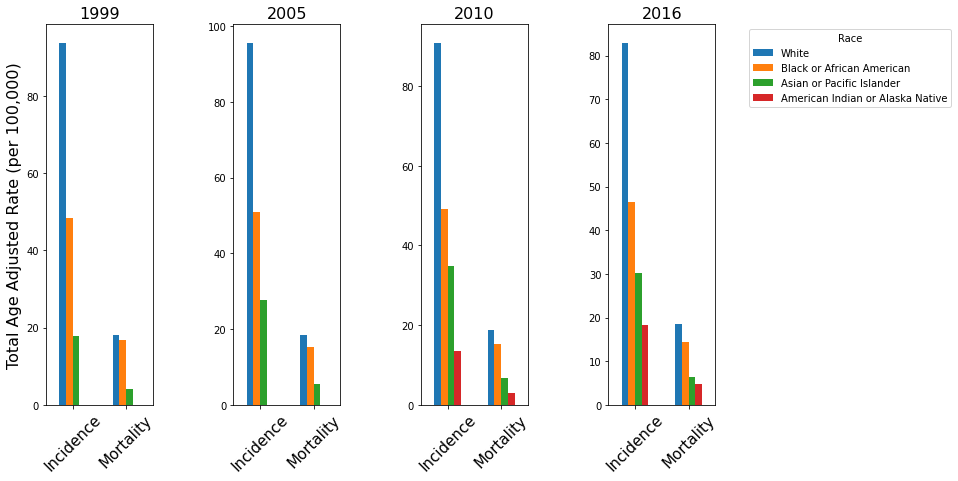

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, figsize=(12,7))
ax1.set_ylabel('Total Age Adjusted Rate (per 100,000)', size=16)
lungdf1999[races].plot(ax=ax1, kind="bar")
lungdf2005[races].plot(ax=ax2, kind="bar")
lungdf2010[races].plot(ax=ax3, kind="bar")
lungdf2016[races].plot(ax=ax4, kind="bar")
fig.subplots_adjust(wspace = 0.75, hspace=0.5)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.legend(loc='upper right', bbox_to_anchor=(3.25, 1), title="Race")
ax1.set_title("1999", size=16)
ax2.set_title("2005", size=16)
ax3.set_title("2010", size=16)
ax4.set_title("2016", size=16)
ax1.tick_params(axis='x', labelsize=15, rotation=45)
ax2.tick_params(axis='x', labelsize=15, rotation=45)
ax3.tick_params(axis='x', labelsize=15, rotation=45)
ax4.tick_params(axis='x', labelsize=15, rotation=45)

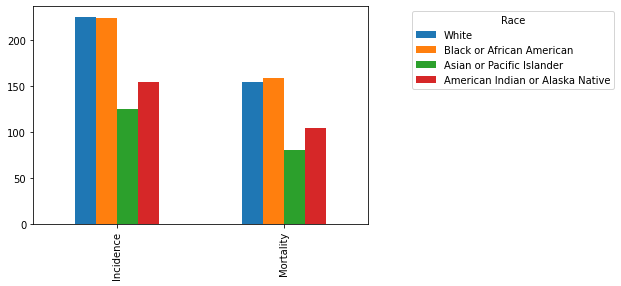

In [27]:
lungdf[races].plot(kind="bar")
plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1), title="Race")

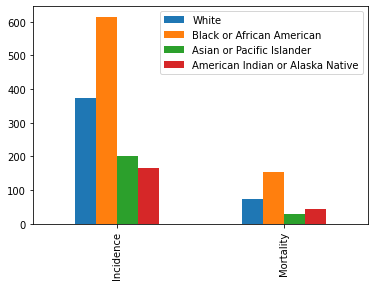

In [28]:
prostdf = cancerdf("Prostate")
prostdf[races].plot(kind="bar")
plt.legend(loc="upper right")

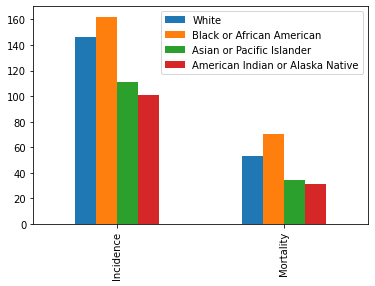

In [29]:
colondf = cancerdf("Colon and Rectum")
colondf[races].plot(kind="bar")
plt.legend(loc="upper right")

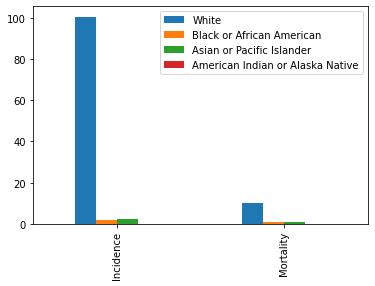

In [30]:
melanomadf = cancerdf("Melanoma of the Skin")
melanomadf[races].plot(kind="bar")

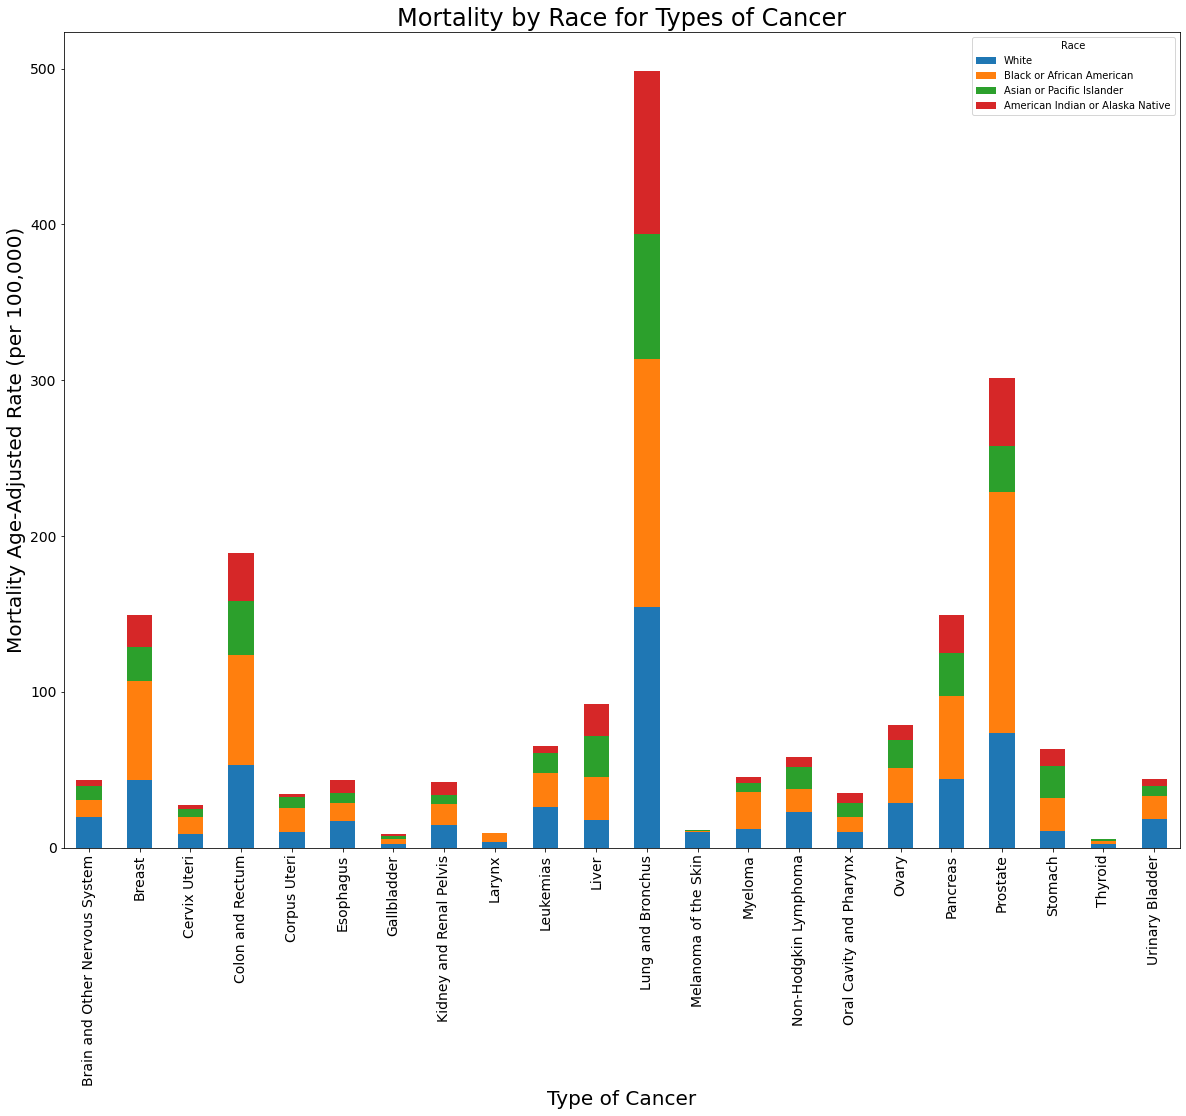

In [31]:
mortdf[races].plot(kind="bar", stacked=True, figsize=(20,15))
plt.ylabel("Mortality Age-Adjusted Rate (per 100,000)", size=20)
plt.xlabel("Type of Cancer", size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Mortality by Race for Types of Cancer", size=24)
plt.legend(title = "Race", loc="best")

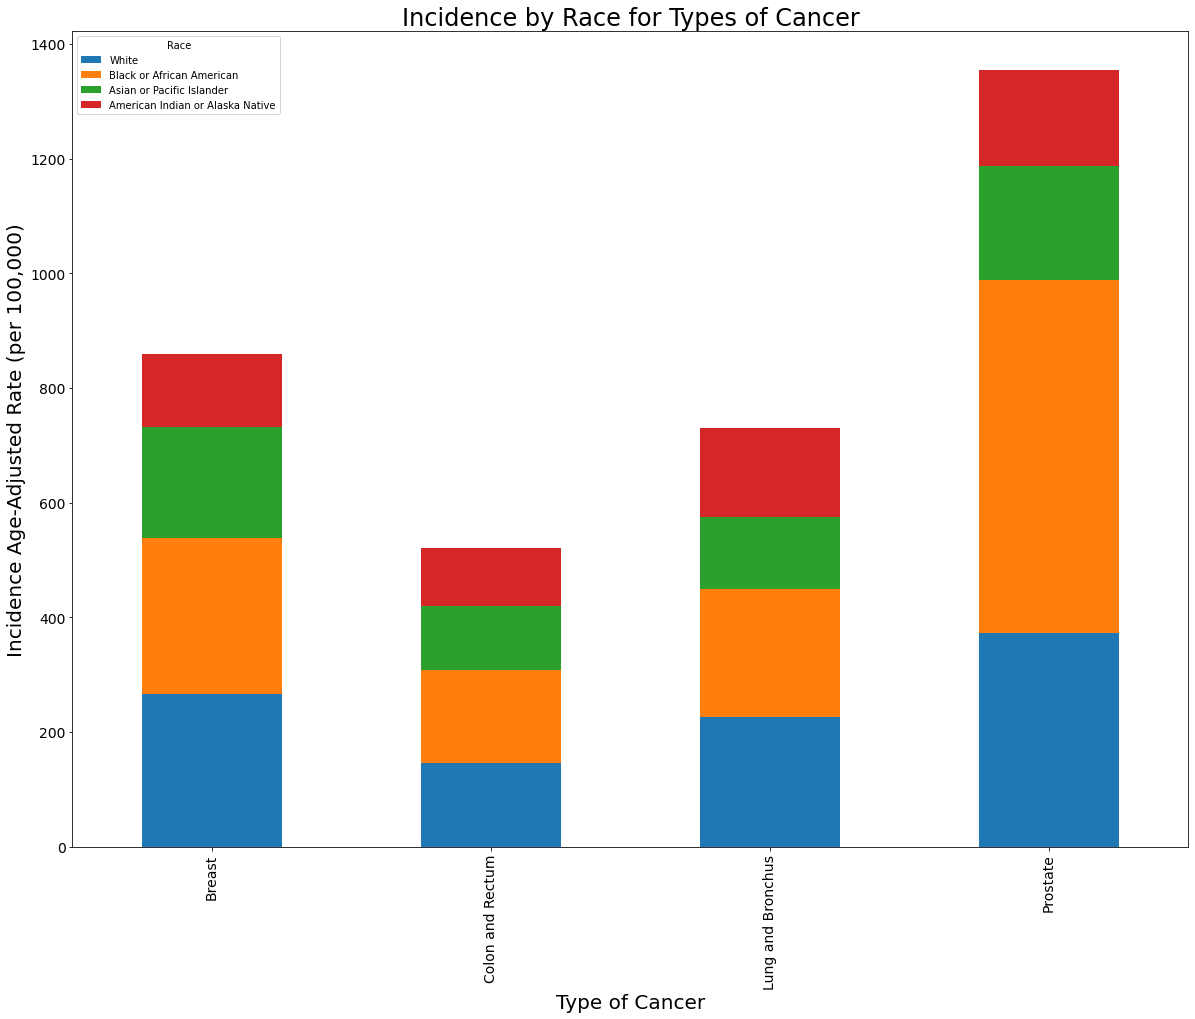

In [32]:
highincdf[races].plot(kind="bar", stacked=True, figsize=(20,15))
plt.ylabel("Incidence Age-Adjusted Rate (per 100,000)", size=20)
plt.xlabel("Type of Cancer", size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Incidence by Race for Types of Cancer", size=24)
plt.legend(title = "Race")

In [33]:
funding_data = pd.read_csv("Funding Data.csv")

for index, row in funding_data.iterrows():
    for col in funding_data.columns:
        if funding_data.at[index, col] == "*" or funding_data.at[index, col] == "**" or funding_data.at[index, col] == "---":
            funding_data.at[index, col] = np.nan

for col in funding_data.columns[1:]:
    funding_data[col] = funding_data[col].astype("float")

cancertypes = list(set(list(funding_data["Unnamed: 0"])))

In [34]:
funding_data

,Unnamed: 0,Incidence,Mort.,US Gov't YLL (thousands),WHO DALY (thousands),Medicare Spend$ (millions),National spend $ (billions),Lost prod. (billions),NCI Funding (millions),AYLL,YLLPI
0,Bladder,70530.0,14680.0,154.4,128.7,1023.0,3.466,1.977,22.6,10.52,2.19
1,"Brain, ONS",22020.0,13140.0,290.8,NaN,293.0,3.715,5.851,193.1,22.13,13.21
2,Breast,209060.0,40230.0,761.3,612.5,1375.0,13.886,10.879,631.2,18.92,3.64
3,Cervix,12200.0,4210.0,104.7,114.1,73.0,1.425,1.808,76.5,24.87,8.58
4,Colon/rectum,142570.0,51370.0,764.6,542.1,3101.0,12.155,12.802,270.4,14.88,5.36
5,Esophogus,16640.0,14500.0,214.2,122.0,386.0,1.071,NaN,30.5,14.77,12.87
6,Hogkin lymph.,8490.0,1320.0,29.8,288.7,1350.0,10.168,0.829,14.6,22.58,3.51
7,Kidney,58240.0,13040.0,195.7,NaN,685.0,3.058,3.633,90.0,15.01,3.36
8,Leukemia,43050.0,21840.0,355.2,210.5,695.0,4.507,5.880,295.8,16.26,8.25
9,Liver,24120.0,18910.0,292.2,137.8,278.0,NaN,4.638,72.6,15.45,12.11


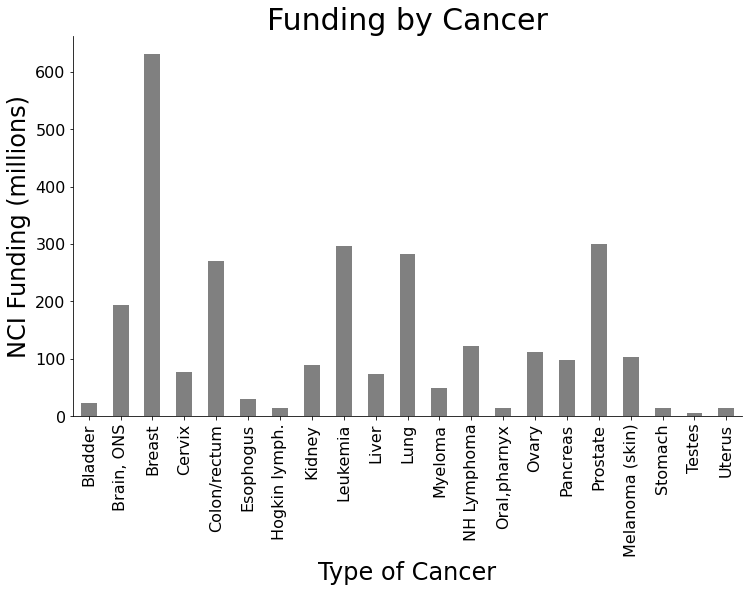

In [42]:
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
funding_data.plot(ax=ax, x="Unnamed: 0", y="NCI Funding (millions)", kind="bar", legend=False, figsize=(12,7), color="grey")
plt.xlabel("Type of Cancer", size=24)
plt.xticks(size=16)
plt.ylabel("NCI Funding (millions)", size=24)
plt.yticks(size=16)
plt.title("Funding by Cancer", size=30)
ax.get_figure().savefig("allfund.svg", bbox_inches="tight")

In [55]:
top5=["Breast", "Colon/rectum", "Leukemia", "Lung", "Prostate"]

In [56]:
spending=["Medicare Spend$ (millions)", "National spend $ (billions)", "NCI Funding (millions)"]
newspending=["Medicare Spending", "National spend $ (billions)", "NCI Funding"]

In [57]:
newfunding= pd.DataFrame()
for i in range(len(funding_data)):
    if funding_data.iloc[i]["Unnamed: 0"] in top5:
        newfunding[funding_data.iloc[i]["Unnamed: 0"]] = funding_data.iloc[i]
newfunding=newfunding.T

In [58]:
plotdf = newfunding[spending]
plotdf = plotdf.astype(float)

In [59]:
plotdf["Medicare Spending"] = plotdf["Medicare Spend$ (millions)"]/1000
plotdf["NCI Funding"] = plotdf["NCI Funding (millions)"] / 1000

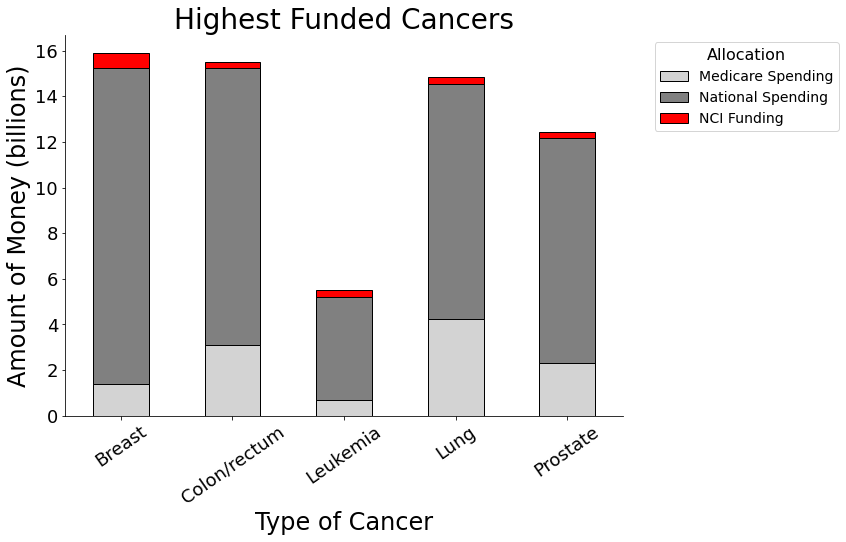

In [60]:
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plotdf[newspending].plot(ax=ax, kind="bar", stacked=True, figsize=(10,7), color=["lightgrey", "grey", "red"], edgecolor="black")
L = plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Allocation", fontsize=14)
plt.setp(L.get_title(),fontsize=16)
L.get_texts()[1].set_text('National Spending')
plt.xlabel("Type of Cancer", size=24)
plt.ylabel("Amount of Money (billions)", size=24)
plt.xticks(size=18, rotation=35)
plt.yticks(size=18)
plt.title("Highest Funded Cancers", size=28)
ax.get_figure().savefig("topfund.svg", bbox_inches="tight")